In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

from allensdk.brain_observatory.ecephys.ecephys_session import EcephysSession

In [2]:
path = '/home/nile/Documents/allen_institute/allensdk/ecephys_nwb/ecephys_session_761777909.nwb'
session = EcephysSession.from_nwb_path(path)

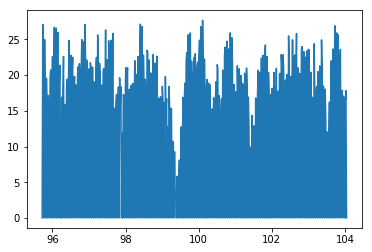

In [3]:
plt.plot(session.running_speed.timestamps[4000:4500], session.running_speed.values[4000:4500])

In [4]:
print(session.stimulus_table)
session.stimulus_table.to_dataframe().head()

<xarray.Dataset>
Dimensions:            (stimulus_frame_id: 70931)
Coordinates:
  * stimulus_frame_id  (stimulus_frame_id) int64 0 1 2 3 ... 70928 70929 70930
Data variables:
    start_time         (stimulus_frame_id) float32 28.979591 ... 9726.081
    stop_time          (stimulus_frame_id) float32 89.063065 ... 9726.582
    stimulus_name      (stimulus_frame_id) object '' ... 'contrast_response'
    stimulus_block     (stimulus_frame_id) float64 nan 0.0 0.0 ... 15.0 15.0
    TF                 (stimulus_frame_id) float64 nan 4.0 4.0 ... 2.0 2.0 2.0
    SF                 (stimulus_frame_id) float64 nan 0.08 0.08 ... 0.04 0.04
    Ori                (stimulus_frame_id) float64 nan 0.0 45.0 ... 90.0 0.0 0.0
    Contrast           (stimulus_frame_id) float64 nan 0.8 0.8 ... 0.01 0.13 0.2
    Pos_x              (stimulus_frame_id) float64 nan 20.0 0.0 ... nan nan nan
    Pos_y              (stimulus_frame_id) float64 nan -40.0 20.0 ... nan nan
    stimulus_index     (stimulus_frame_id) fl

,start_time,stop_time,stimulus_name,stimulus_block,TF,SF,Ori,Contrast,Pos_x,Pos_y,stimulus_index,Color,Image,Phase
stimulus_frame_id,,,,,,,,,,,,,,
0,28.979591,89.063065,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,89.063065,89.313263,gabor_20_deg_250ms,0.0,4.0,0.08,0.0,0.8,20.0,-40.0,0.0,NaN,NaN,NaN
2,89.313263,89.563461,gabor_20_deg_250ms,0.0,4.0,0.08,45.0,0.8,0.0,20.0,0.0,NaN,NaN,NaN
3,89.563461,89.796982,gabor_20_deg_250ms,0.0,4.0,0.08,0.0,0.8,20.0,0.0,0.0,NaN,NaN,NaN
4,89.796982,90.047180,gabor_20_deg_250ms,0.0,4.0,0.08,45.0,0.8,40.0,-10.0,0.0,NaN,NaN,NaN


In [5]:
print(session.units_table)
session.units_table.to_dataframe().head()

<xarray.Dataset>
Dimensions:                    (unit_id: 509)
Coordinates:
  * unit_id                    (unit_id) int64 812151398 812151400 ... 812149402
Data variables:
    firing_rate                (unit_id) float64 2.726 0.4469 ... 7.608 4.587
    isi_violations             (unit_id) float64 0.3195 24.84 ... 0.4887 2.63
    local_index_unit           (unit_id) int64 0 1 2 3 4 194 ... 69 70 71 72 73
    peak_channel_id            (unit_id) int64 812150630 812150630 ... 812148738
    quality                    (unit_id) object 'good' 'good' ... 'good' 'noise'
    snr                        (unit_id) float64 1.079 1.587 ... 1.757 1.073
    local_index_channel        (unit_id) int64 0 0 0 7 7 ... 122 123 124 125 125
    probe_horizontal_position  (unit_id) int64 43 43 43 27 27 ... 59 27 43 11 11
    probe_id                   (unit_id) int64 768906383 768906383 ... 768906387
    probe_vertical_position    (unit_id) int64 20 20 20 80 ... 1260 1260 1260
    valid_data                 

,firing_rate,isi_violations,local_index_unit,peak_channel_id,quality,snr,local_index_channel,probe_horizontal_position,probe_id,probe_vertical_position,valid_data,description,location
unit_id,,,,,,,,,,,,,
812151398,2.726422,0.319471,0,812150630,good,1.079473,0,43,768906383,20,True,probeA,
812151400,0.446933,24.843956,1,812150630,good,1.587278,0,43,768906383,20,True,probeA,
812151402,3.971149,0.314082,2,812150630,good,2.223048,0,43,768906383,20,True,probeA,
812151404,0.151645,0.473731,3,812150644,good,2.373282,7,27,768906383,80,True,probeA,
812151406,0.172230,4.587974,4,812150644,good,2.361921,7,27,768906383,80,True,probeA,


In [6]:
np.unique(session.stimulus_table['stimulus_name'])

array(['', 'Natural Images', 'contrast_response', 'drifting_gratings',
       'flash_250ms', 'gabor_20_deg_250ms', 'natural_movie_1',
       'natural_movie_3', 'static_gratings'], dtype=object)

In [7]:
flash_250_ms_stimulus_frames = session.filter_stimulus_frames(
    session.stimulus_table['stimulus_name'] == 'flash_250ms'
)
flash_250_ms_stimulus_frames.to_dataframe().head()

,start_time,stop_time,stimulus_name,stimulus_block,Contrast,stimulus_index,Color
stimulus_frame_id,,,,,,,
3647,1290.049683,1290.299927,flash_250ms,1.0,0.8,1.0,-1.0
3648,1292.051392,1292.301636,flash_250ms,1.0,0.8,1.0,1.0
3649,1294.052979,1294.303223,flash_250ms,1.0,0.8,1.0,-1.0
3650,1296.054688,1296.304932,flash_250ms,1.0,0.8,1.0,1.0
3651,1298.056396,1298.306519,flash_250ms,1.0,0.8,1.0,-1.0


In [8]:
good_units = session.filter_units_table(
    (session.units_table['quality'] == 'good')
    & (session.units_table['snr'] > 1),
)
good_units.to_dataframe().head()

,firing_rate,isi_violations,local_index_unit,peak_channel_id,quality,snr,local_index_channel,probe_horizontal_position,probe_id,probe_vertical_position,valid_data,description,location
unit_id,,,,,,,,,,,,,
812151398,2.726422,0.319471,0.0,812150630.0,good,1.079473,0.0,43.0,768906383.0,20.0,1.0,probeA,
812151400,0.446933,24.843956,1.0,812150630.0,good,1.587278,0.0,43.0,768906383.0,20.0,1.0,probeA,
812151402,3.971149,0.314082,2.0,812150630.0,good,2.223048,0.0,43.0,768906383.0,20.0,1.0,probeA,
812151404,0.151645,0.473731,3.0,812150644.0,good,2.373282,7.0,27.0,768906383.0,80.0,1.0,probeA,
812151406,0.172230,4.587974,4.0,812150644.0,good,2.361921,7.0,27.0,768906383.0,80.0,1.0,probeA,


In [9]:
ds = session.framewise_spike_counts(
    bin_edges=np.linspace(-0.01, 1.0, 201),
    stimulus_frames=flash_250_ms_stimulus_frames,
    units=good_units,
    binarize=False
)
print(ds)

<xarray.Dataset>
Dimensions:                          (stimulus_frame_id: 150, time_relative_to_stimulus_onset: 200, unit_id: 366)
Coordinates:
  * stimulus_frame_id                (stimulus_frame_id) int64 3647 ... 3796
  * time_relative_to_stimulus_onset  (time_relative_to_stimulus_onset) float64 -0.007475 ... 0.9975
  * unit_id                          (unit_id) int64 812151398 ... 812149400
Data variables:
    spike_counts                     (stimulus_frame_id, time_relative_to_stimulus_onset, unit_id) uint16 0 ... 0


In [10]:
ds['mean_spike_counts'] = ds['spike_counts'].mean(dim='stimulus_frame_id')
print(ds)

<xarray.Dataset>
Dimensions:                          (stimulus_frame_id: 150, time_relative_to_stimulus_onset: 200, unit_id: 366)
Coordinates:
  * stimulus_frame_id                (stimulus_frame_id) int64 3647 ... 3796
  * time_relative_to_stimulus_onset  (time_relative_to_stimulus_onset) float64 -0.007475 ... 0.9975
  * unit_id                          (unit_id) int64 812151398 ... 812149400
Data variables:
    spike_counts                     (stimulus_frame_id, time_relative_to_stimulus_onset, unit_id) uint16 0 ... 0
    mean_spike_counts                (time_relative_to_stimulus_onset, unit_id) float64 0.0 ... 0.04667


<IPython.core.display.Javascript object>


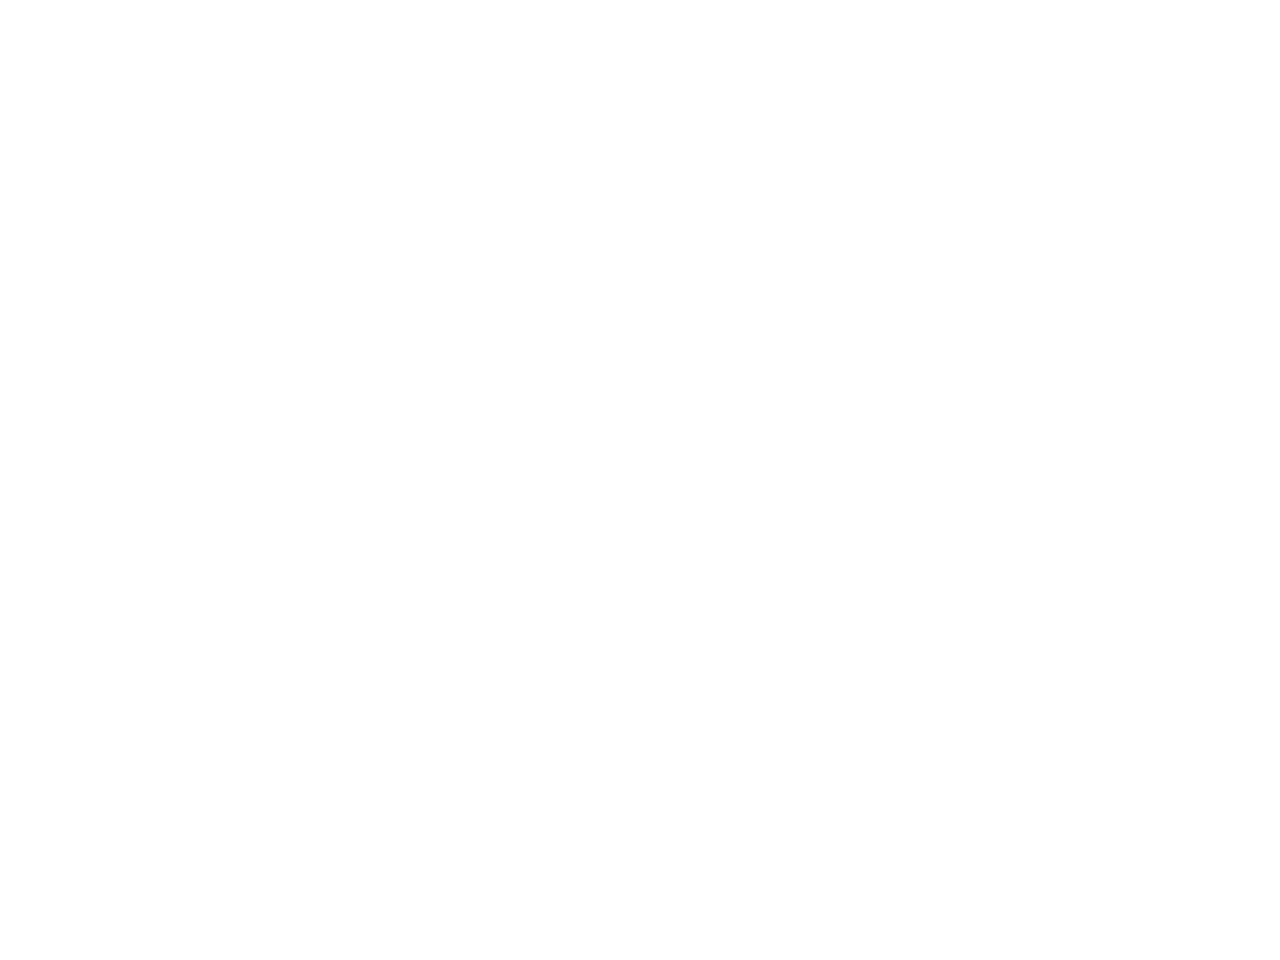

(150, 200, 366)


In [11]:
%matplotlib notebook
plt.subplots()
plt.imshow(ds['spike_counts'][80,:, :].T, interpolation='none')
plt.colorbar()
print(ds['spike_counts'].shape)

<IPython.core.display.Javascript object>


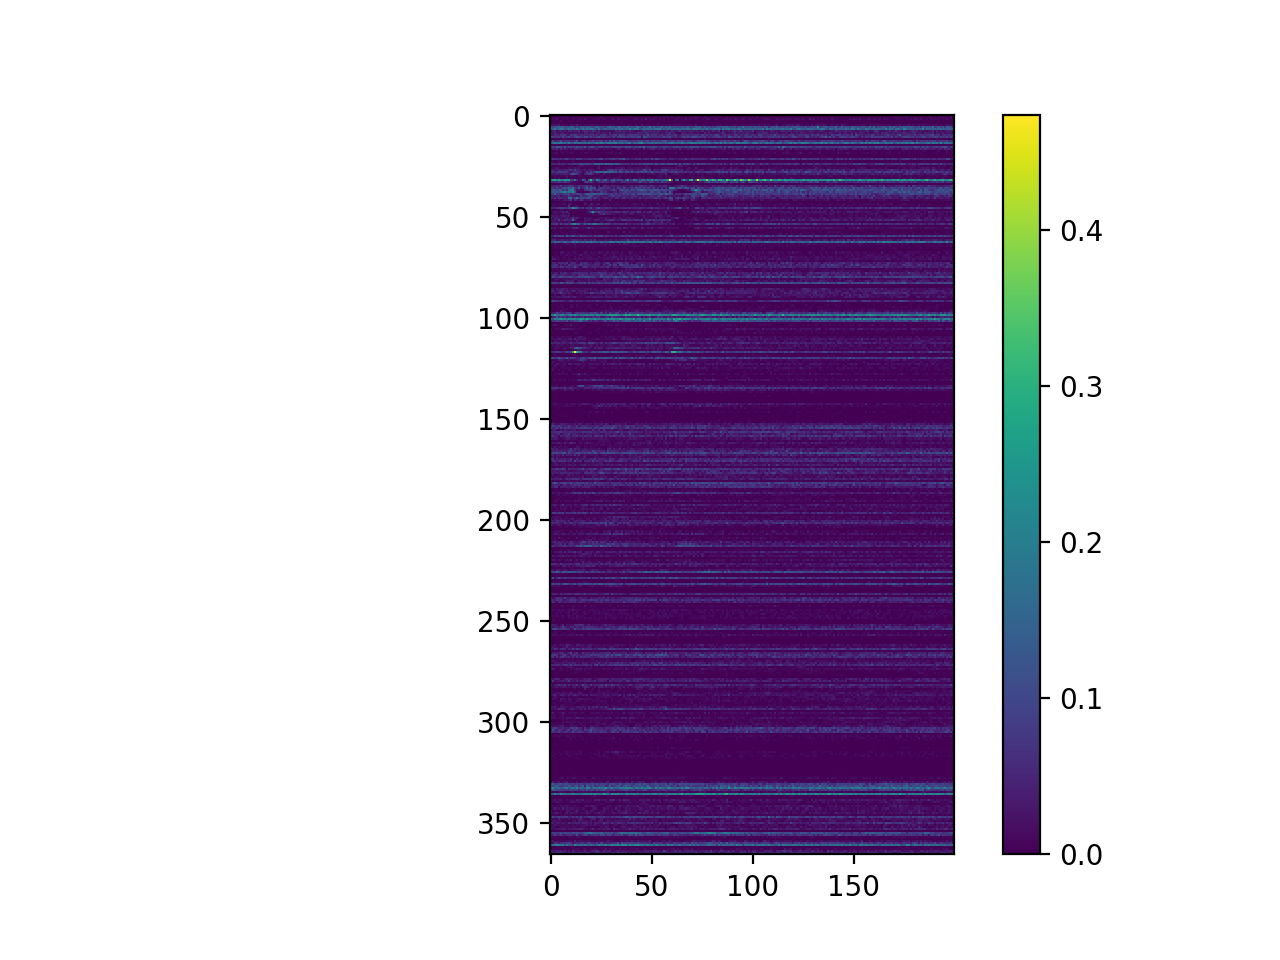

In [12]:
%matplotlib notebook
plt.subplots()
plt.imshow(ds['mean_spike_counts'].T, interpolation='none')
plt.colorbar()

In [13]:
drifting_gratings_frames = session.filter_stimulus_frames(
    (session.stimulus_table['stimulus_name'] == 'drifting_gratings')
    & (session.stimulus_table['TF'] == 8)
)

good_probea_units = session.filter_units_table(
    (session.units_table['quality'] == 'good')
    & (session.units_table['snr'] > 2)
    & (session.units_table['description'] == 'probeA')
)

times = session.framewise_spike_times(
    stimulus_frames=drifting_gratings_frames,
    units=good_probea_units
)

print(times.head())

             stimulus_frame_id    unit_id
spike_time                               
1619.022797               3807  812151402
1617.530929               3807  812151402
1618.214130               3807  812151402
1618.600397               3807  812151402
1618.389863               3807  812151402


In [56]:
txr = times.reset_index().set_index(keys='stimulus_frame_id')
dgfdf = drifting_gratings_frames.reindex({'stimulus_frame_id': txr.index}).to_dataframe()
dgfdf = dgfdf.drop(columns=['start_time', 'stop_time', 'stimulus_block']).head(500)
merged = txr.merge(dgfdf, left_on='stimulus_frame_id', right_index=True, how='inner').reset_index().set_index(keys='spike_time')

In [57]:
merged.head()

,stimulus_frame_id,unit_id,stimulus_name,TF,SF,Ori,Contrast,stimulus_index
spike_time,,,,,,,,
1619.022797,3807,812151402,drifting_gratings,8.0,0.04,45.0,0.8,2.0
1619.022797,3807,812151402,drifting_gratings,8.0,0.04,45.0,0.8,2.0
1619.022797,3807,812151402,drifting_gratings,8.0,0.04,45.0,0.8,2.0
1619.022797,3807,812151402,drifting_gratings,8.0,0.04,45.0,0.8,2.0
1619.022797,3807,812151402,drifting_gratings,8.0,0.04,45.0,0.8,2.0


In [95]:
counts = merged.groupby(['TF', 'SF', 'Ori', 'Contrast', 'unit_id']).apply(
    lambda df: df.shape[0]
).sort_values(ascending=False)
counts = counts[~counts.index.get_level_values('unit_id').duplicated()]
counts

TF   SF    Ori    Contrast  unit_id  
8.0  0.04  45.0   0.8       812151658    8696
                            812151670    8160
           135.0  0.8       812151664    7049
           90.0   0.8       812151408    5579
                            812151410    5323
                            812151550    5236
                            812151426    4948
                            812151466    4946
                            812151424    4485
                            812151476    4231
                            812151420    3948
                            812151430    3596
                            812151626    3457
           135.0  0.8       812151746    3211
           90.0   0.8       812151760    3198
           45.0   0.8       812151692    2994
                            812151636    2857
           90.0   0.8       812151472    2784
                            812151442    2646
                            812151486    2407
           45.0   0.8       812151448    2